In [1]:
#Import packages 
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap 
%matplotlib inline

In [2]:
#import raw data 
P0 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno0.csv")
P1 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno1.csv")
P2 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno2.csv")
P3 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno3.csv")

#Check if imported correctly 
display(P0.columns)

#Required cols 
req_cols = ['csn', "bilirubin_total", 'troponin', 'platelets', 'pulse', 'map_cuff']
P0 = P0[req_cols]
P1 = P1[req_cols]
P2 = P2[req_cols]
P3 = P3[req_cols]

P = [P0, P1, P2, P3]


#Fill na
P0.fillna(0, inplace=True)
P1.fillna(0, inplace=True)
P2.fillna(0, inplace=True)
P3.fillna(0, inplace=True)

display(P3.head())


P = [P0, P1, P2, P3]
p0_mean = P0.groupby("csn").mean().reset_index()
p1_mean = P1.groupby("csn").mean().reset_index()
p2_mean = P2.groupby("csn").mean().reset_index()
p3_mean = P3.groupby("csn").mean().reset_index()

p_mean =[p0_mean, p1_mean, p2_mean, p3_mean]

display(p3_mean.head())

Index(['Unnamed: 0', 'csn', 'phenotype_0', 'charttime', 'pt_id',
       'total_hosp_days', 'discharge_to', 'pulse', 'temperature', 'sbp_cuff',
       'dbp_cuff', 'map_cuff', 'unassisted_resp_rate', 'end_tidal_co2', 'spo2',
       'fio2', 'base_excess', 'bicarb_(hco3)',
       'partial_pressure_of_carbon_dioxide_(paco2)', 'ph',
       'saturation_of_oxygen_(sao2)', 'chloride', 'creatinine',
       'bilirubin_direct', 'glucose', 'lactate_dehydrogenase', 'magnesium',
       'SIRS_resp', 'SIRS_cardio', 'SIRS_temp', 'SIRS_wbc', 'hourly_total',
       'partial_prothrombin_time_(ptt)', 'platelets', 'white_blood_cell_count',
       'fibrinogen', 'bilirubin_total', 'troponin', 'potassium', 'hemoglobin',
       'hematocrit', 'phosphorus', 'first_sep3_time', '_merge'],
      dtype='object')

,csn,bilirubin_total,troponin,platelets,pulse,map_cuff
0,11057156295,0.5,0.0,173.0,105.0,0.0
1,11057156295,0.5,0.0,173.0,105.0,0.0
2,11057156295,0.5,0.0,173.0,108.0,0.0
3,11057156295,0.5,0.0,173.0,104.0,0.0
4,11057156295,0.5,0.0,173.0,100.0,0.0


,csn,bilirubin_total,troponin,platelets,pulse,map_cuff
0,11679027,0.245833,0.00,396.250000,82.958333,75.750000
1,12056175,33.387500,0.00,229.333333,114.916667,58.708333
2,12109048,0.400000,0.04,214.375000,79.416667,67.500000
3,14580061,0.325000,0.03,225.000000,73.583333,72.458333
4,15226129,0.345833,0.00,239.375000,86.166667,80.916667


In [3]:
p0 = p0_mean.iloc[:, 5]
p1 = p1_mean.iloc[:, 5]
p2 = p2_mean.iloc[:, 5]
p3 = p3_mean.iloc[:, 5]

p_map = [p0, p1, p2, p3]
for i in p_map: 
    print(i.shape)

(48150,)
(27504,)
(24132,)
(40735,)


In [4]:
import pandas as pd

#col_add = [p0, p1, p2, p3].astype(float)
col_add = ['P0', 'P1', 'P2', 'P3']
counts = [48150, 27504, 24132, 40735]

data = {'Pheno': [], 'Count': []}

for col, count in zip(col_add, counts):
    data['Pheno'].extend([col] * count)
    data['Count'].extend([count] * count)

pheno_df = pd.DataFrame(data)
pheno_df['Count'] = pheno_df['Count'].astype(float)


# Define a mapping from string values to integers
mapping = {'P0': 0, 'P1': 1, 'P2': 2, 'P3': 3}

# Apply the mapping to the 'Pheno' column
pheno_df['Pheno'] = pheno_df['Pheno'].map(mapping)


display(pheno_df)
display(pheno_df.shape)
pheno_df = pheno_df['Pheno']
display(pheno_df)


combined_map = pd.concat(p_map, axis=0)
display(combined_map.shape)

,Pheno,Count
0,0,48150.0
1,0,48150.0
2,0,48150.0
3,0,48150.0
4,0,48150.0
...,...,...
140516,3,40735.0
140517,3,40735.0
140518,3,40735.0
140519,3,40735.0


(140521, 2)

0         0
1         0
2         0
3         0
4         0
         ..
140516    3
140517    3
140518    3
140519    3
140520    3
Name: Pheno, Length: 140521, dtype: int64

(140521,)

In [7]:
combined_map.reset_index(drop=True, inplace=True)
pheno_df.reset_index(drop=True, inplace=True)

combined_df = pd.concat([combined_map, pheno_df], axis=1)


display(combined_df.head())
display(combined_df.map_cuff.value_counts())
display(combined_df.Pheno.value_counts())

,map_cuff,Pheno
0,75.750000,0
1,58.708333,0
2,67.500000,0
3,82.916667,0
4,72.458333,0


map_cuff
0.000000      10351
78.000000       142
75.833333       128
76.000000       126
72.333333       125
              ...  
89.369792         1
108.868056        1
111.275000        1
80.767361         1
87.497222         1
Name: count, Length: 14852, dtype: int64

Pheno
0    48150
3    40735
1    27504
2    24132
Name: count, dtype: int64

In [8]:
display(combined_df.shape)
display(combined_df.columns)

(140521, 2)

Index(['map_cuff', 'Pheno'], dtype='object')

In [9]:
display(combined_df.head())
display(combined_df.tail())

,map_cuff,Pheno
0,75.750000,0
1,58.708333,0
2,67.500000,0
3,82.916667,0
4,72.458333,0


,map_cuff,Pheno
140516,66.435606,3
140517,0.000000,3
140518,112.447917,3
140519,6.416667,3
140520,62.208333,3


/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


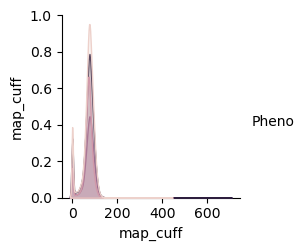

In [10]:
sns.pairplot(combined_df, hue='Pheno')

In [11]:
umap_reducer = umap.UMAP(n_components=2, n_neighbors=25, min_dist=0.99, random_state=42)
umap_result = umap_reducer.fit_transform(combined_df)

/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
print(umap_result)
print(len(umap_result))

[[-17.798363  -11.983109 ]
 [-17.837185    3.7308066]
 [-14.391934  -12.961142 ]
 ...
 [  3.5205195   0.1806788]
 [  4.696454   13.094596 ]
 [ 13.658339  -11.281194 ]]
140521


In [13]:
display(umap_result[:, 0])
display(umap_result[:, 1])

array([-17.798363 , -17.837185 , -14.391934 , ...,   3.5205195,
         4.696454 ,  13.658339 ], dtype=float32)

array([-11.983109 ,   3.7308066, -12.961142 , ...,   0.1806788,
        13.094596 , -11.281194 ], dtype=float32)

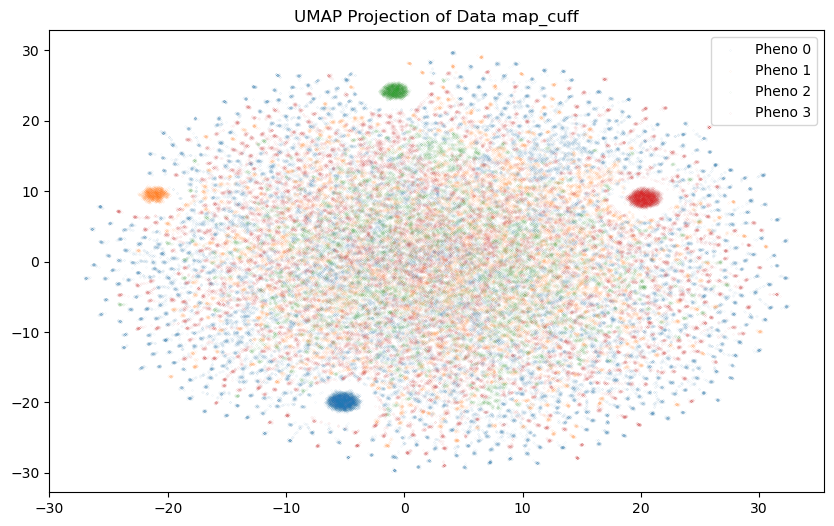

In [14]:
#Plotting 
import matplotlib.cm as cm

# Define a color map with 4 distinct colors
colors = cm.tab10  # You can choose other color maps too

# Create a scatter plot with distinct colors for each Pheno category
plt.figure(figsize=(10, 6))
for pheno_val in range(4):  # Assuming you have 4 Pheno categories
    mask = combined_df['Pheno'] == pheno_val
    plt.scatter(
        umap_result[mask, 0],
        umap_result[mask, 1],
        label=f'Pheno {pheno_val}',
        c=[colors(pheno_val)],
        s=0.001 # Adjust the size parameter (e.g., s=10)
    )

plt.title('UMAP Projection of Data map_cuff')
plt.legend()
plt.show()


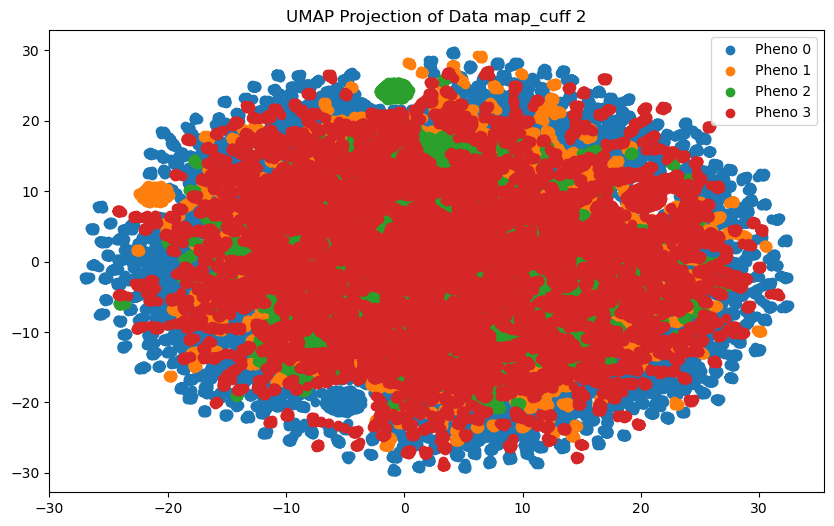

In [15]:
import matplotlib.cm as cm

# Define a color map with 4 distinct colors
colors = cm.tab10  # You can choose other color maps too

# Create a scatter plot with distinct colors for each Pheno category
plt.figure(figsize=(10, 6))
for pheno_val in range(4):  # Assuming you have 4 Pheno categories
    mask = combined_df['Pheno'] == pheno_val
    plt.scatter(umap_result[mask, 0], umap_result[mask, 1], label=f'Pheno {pheno_val}', c=[colors(pheno_val)])

plt.title('UMAP Projection of Data map_cuff 2')
plt.legend()
plt.show()
